In [ ]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

In [ ]:
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcParams['axes.prop_cycle'].by_key()['color']

user_cycle = cycler(color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf'])

# user_cycle = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E','#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
plt.rcParams['axes.prop_cycle']  = user_cycle



C:\Users\takeh\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


parameter -> [-2.38923249e+01  1.49544578e+01 -3.70439458e+00  4.55438680e-01
 -2.78524442e-02  6.78865027e-04  1.77856369e-01]
error -> [1.85249938e+03 9.18292223e+02 1.69519081e+02 1.38519849e+01
 4.25024986e-01 6.65250674e-04 2.20015728e+01]
0.004134877878875898
0.9901951597184839


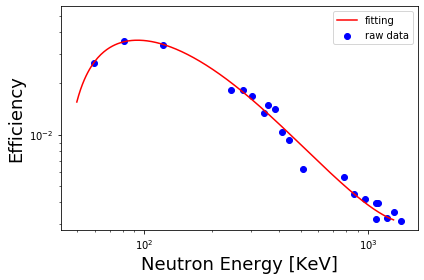

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

reference = "../reference/"#プログラムで読み取るファイルを入れるフォルダ

xdata = []
ydata = []

x = []
for i in range(50,1300):
    x.append(i)


f = open(reference + "/efficiency.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    xdata.append(float(s[0]))
    ydata.append(float(s[1]))
#     print(s[0],s[1])
    line = f.readline()
f.close


##### フィッティングする関数y=f(x)の定義
def func(x, a0, a1, a2, a3 , a4, a5, E):
    return a0 + a1*np.log(x/E) + a2*(np.log(x/E))**2 + a3*(np.log(x/E))**3 + a4*(np.log(x/E))**4 + a5*(np.log(x/E))**5
# def func(x, a0, a1, a2, a3, a4, E):
#     return np.exp(a0 + a1*np.log(x/E) + a2*(np.log(x/E))**2 + a3*(np.log(x/E))**3 + a4*(np.log(x/E))**4)

##### 最適化するy=f(x)の係数の初期値
# prameter_initial = np.array([-2, -0.07, 1, 1, 1, 100])
prameter_initial = np.array([1,1, 1, 1, 1, 1,1])

##### 最適化の計算[2]
popt, pcov = curve_fit(func, xdata, ydata, p0= prameter_initial,maxfev=100000)
perr = np.sqrt(np.diag(pcov)) #推定されたパラメータの各々の誤差
print ("parameter ->", popt)
print("error ->",perr)

##### 最適化後のy=f(x)の関数
# y = func(x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])
y = func(x, *popt)

##### 生データと最適化後の関数をグラフにプロット
# 元の生データを点プロット
plt.scatter(xdata, ydata, c='blue', label='raw data')
# 最適化後のフィット関数を線でプロット
plt.plot(x, y, 'r-',label = "fitting")

##### グラフ表示のオプション設定 #####
plt.xlabel('Neutron Energy [KeV]', fontsize=18)     # x軸の名称とフォントサイズ
plt.ylabel('Efficiency', fontsize=18)     # y軸の名称とフォントサイズ
plt.yscale("log")                # y軸のスケールをログに指定
plt.xscale("log")  
# plt.ylim([1e15,1e20])            # y軸のレンジの範囲を指定
#plt.rcParams["font.size"]=16    # 全体のフォントを変更
plt.legend(loc='upper right')    # ラベルを右上に記載
plt.tight_layout()   # タイトルを重ねない
# plt.xlim(40,150)
# plt.show()                       # グラフをプロット
plt.savefig("optimize_fit.png")  # 画像をファイルで保存
print(func(934.46, *popt))

 

e = y = func(xdata, *popt) #モデル計算された数値例
 
residuals =  ydata - e #残渣
rss = np.sum(residuals**2)      #残差平方和: residual sum of squares = rss
tss = np.sum((ydata-np.mean(ydata))**2) #全平方和: total sum of squares = tss
r_squared = 1 - (rss / tss)     #決定係数R^2
 
print(r_squared)
# -> 0.8857142857142857

['9.400360E+4', '0.000000E+0', '1.000000E+5', '1.068580E-3', '1.100000E+5', '3.384700E-3', '1.200000E+5', '5.885730E-3', '1.267750E+5', '7.608520E-3', '1.300000E+5', '8.572210E-3', '1.400000E+5', '1.160090E-2', '1.500000E+5', '1.472990E-2', '1.600000E+5', '1.796820E-2', '1.700000E+5', '2.135560E-2', '1.800000E+5', '2.486270E-2', '1.900000E+5', '2.848500E-2', '2.000000E+5', '3.229940E-2', '2.250000E+5', '4.250780E-2', '2.500000E+5', '5.351470E-2', '2.750000E+5', '6.540780E-2', '3.000000E+5', '7.797280E-2', '3.278750E+5', '9.280720E-2', '4.000000E+5', '1.188670E-1', '4.271420E+5', '1.301640E-1', '5.000000E+5', '1.465410E-1', '6.000000E+5', '1.770320E-1', '7.000000E+5', '2.091630E-1', '7.806060E+5', '2.353080E-1', '7.940120E+5', '2.395550E-1', '8.000000E+5', '2.398470E-1', '9.000000E+5', '2.629230E-1', '9.307600E+5', '2.704070E-1', '9.586610E+5', '2.946890E-1', '9.824830E+5', '3.076700E-1', '1.000000E+6', '3.153920E-1', '1.000350E+6', '3.155510E-1', '1.071210E+6', '3.443910E-1', '1.100000

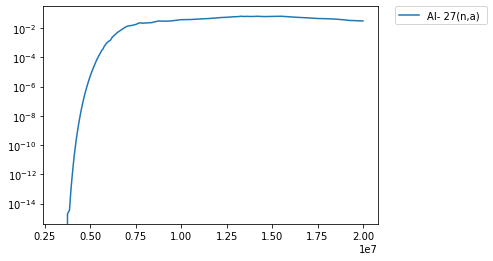

In [2]:
##MF10から使える反応を抽出しreactionリストをつくる[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均質量数、Σσφ]
#またreactionリストの順番に対応する断面積スペクトルのcrossリストも作る
p = 1
import os
import numpy as np
import math
from tqdm.notebook import tqdm as tqdm

reference = "../reference/"#プログラムで読み取るファイルを入れるフォルダ
Threshhold_MIN = float(0)
Threshhold_MAX = float(20E+6)


first_make_reaction_list = "y"#自分の書いた反応に漏れがないか確認y:する、n:しない
ll=["(n,He3)","(n,t)","(n,2na)","(n,2p)","(n,d)","(n,2n)","(n,np)","(n,p)","(n,pa)","(n,na)","(n,n')","(n,a)","(n,nd)","(n,2np)","(n,3n)","(n,nt)"]#自分が書いた反応
print_reaction_list = "y"#リアクションリストをy:表示、n:表示しない
print_cross_section_list = "n"#リアクションリストに伴わせて断面積（JENDLから拾ったままの形状）のリストをy:表示、n:表示しない
plot_Nb_cross_section = "n"#Nbの断面積をプロットするかどうか
calc_considering_neutron_absorbtion = "n"#中性子の自己吸収を考慮するかどうか
considering_neutron_absorbtion_list = ["Au197.nt3","Ir191.nt3","Ir193.nt3","Os192.nt3","Re187.nt3","Sb123.nt3","Ta181.nt3","Nb093.nt3"]#計算しなおすファイル
# considering_neutron_absorbtion_list = ["Au197.nt3","Os192.nt3","Sb123.nt3","Ta181.nt3","Nb093.nt3"]#計算しなおすファイル
# plot_cross_section = [["Ta-181","MF=10 MT= 16 (n,2n) reaction  ",0.0],["Ta-181","MF=10 MT= 16 (n,2n) reaction  ",77.1]]#特定の反応の断面積を表示したいときは[元素記号-原子番号、反応の種類、順位]を書く
# plot_cross_section = [["Ta-181","MF=10 MT= 16 (n,2n) reaction  ",0.0]]
# plot_cross_section = [["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",0.0,"#1f77b4"],["Sb-123", "MF=10 MT= 16 Partial (n,2n) re",0.0,"#2ca02c"]]
plot_cross_section = [["Al- 27", "MF=10 MT=107 (n,a) reaction   ",0.0]]
# plot_cross_section = [["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",0.0,"#1f77b4"],["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",84.66,"#2ca02c"],["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",595.66,"#d62728"]]
# plot_cross_section = [["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",0.0,"#1f77b4"],["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",84.66,"#d62728"],["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",595.66,"#2ca02c"]]
# plot_cross_section = [["Au-197", "MF=10 MT= 16 (n,2n) reaction  ",0.0],["Ir-191", "MF=10 MT= 16 (n,2n) reaction  ",0.0],["Ir-193", "MF=10 MT= 16 (n,2n) reaction  ",0.0],["Os-192", "MF=10 MT= 16 (n,2n) reaction  ",0.0]\
#                       ,["Re-187", "MF=10 MT= 16 (n,2n) reaction  ",0.0],["Sb-123", "MF=10 MT= 16 Partial (n,2n) re",0.0],["Ta-181", "MF=10 MT= 16 (n,2n) reaction  ",0.0]]
# plot_cross_section = [['Au-197', 'MF=10 MT= 16 (n,2n) reaction  ', 0],['Au-197', 'MF=10 MT= 16 (n,2n) reaction  ', 84.66],['Au-197', 'MF=10 MT= 16 (n,2n) reaction  ', 595.66]]


spect_energy_list = []#スペクトルのエネルギー値のリスト
spect_fulx_list = []#スペクトルのフラックスのリスト
sigma_reaction_list = []#reaction_listの順番に対応するΣσφのリスト

nist_list = []#NIST.txtの行ごとの文字列を格納したリスト

#nistから読み取った自然界に存在する核種に関するデータを格納するリスト
natural_element_nist_list = []
natural_comp_list = []#存在比
natural_ramass_list = []#相対原子質量
natural_massnum_list = []#原子番号
natural_saw_list = []#平均質量数

#nistから読み取た自然界にないものも含めたすべての核種に関するデータを格納するリスト
element_nist_list = []
massnum_list = []

#JENDLから読み取ったMF=10の反応を格納するリスト[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均質量数、Σσφ]
reaction_list = []

#反応ごとの断面積スペクトルのリスト
cross_section_list = []

cross_section_Nb_list = []# Nbの断面積スペクトルのリスト

    

f = open(reference + "/NIST.txt")
data1 = f.read()
f.close()
lines1 = data1.split("\n") # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
n=0
for line in lines1:
    n = n + 1
    nist_list.append(line+"  ")

f = open(reference + "spectrum.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    spect_energy_list.append(float(s[0]))
    spect_fulx_list.append(float(s[1]))
    line = f.readline()
f.close



def numeric(a):
    k = ""
    if a[len(a)-2] == "+" or a[len(a)-2] == "-":
        for i in range(len(a)):
            if i == len(a)-2:
                k = k + "E" + a[i]
            else:
                k = k + a[i]
        return k
    if a[len(a)-3] == "+" or a[len(a)-3] == "-":
        for i in range(len(a)):
            if i == len(a)-3:
                k = k + "E" + a[i]
            else:
                k = k + a[i]
        return k
    else:
        return a
    
    

#自然界に存在する元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    if len(nist_list[8*i+4]) != 25:#Isotopic Compositionのデータがあるとき（存在比が有意）
        if nist_list[8*i+2][15] == " ":#質量数が１桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14].rjust(3))
        elif nist_list[8*i+2][16] == " ":#質量数が2桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+(nist_list[8*i+2][14]+nist_list[8*i+2][15]).rjust(3))
        else:#質量数が３桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14]+nist_list[8*i+2][15]+nist_list[8*i+2][16])
        
        #同位体存在比を抽出-----------------
        s=nist_list[8*i+4].split()
        comp = ""
        for k in range(len(s[3])):
            if s[3][k] == "(":
                break
            comp = comp + s[3][k]
        natural_comp_list.append(comp.ljust(10))
        
        #相対原子質量を抽出--------------------
        s = nist_list[8*i+3].split()
        ramass = ""
        for l in range(len(s[4])):
            if s[4][l] == "(":
                break
            ramass = ramass + s[4][l]
        natural_ramass_list.append(ramass)
        
        #原子番号を抽出---------------------
        natural_massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))
        
        #平均原子量を抽出
        s = nist_list[8*i+5].split()
        saw = ""
        for j in range(len(s[4])):
            if s[4][j] == "(":
                break
            if s[4][j] != "[" and s[4][j] != "]":
                saw = saw + s[4][j]
        if len(saw.split(",")) == 2:
            d = saw.split(",")
            saw = (float(d[0]) + float(d[1]))/2
        natural_saw_list.append(saw)

        
#すべての元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17])
        
    #原子番号を抽出---------------------
    massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))


if calc_considering_neutron_absorbtion == "y":
    files = considering_neutron_absorbtion_list
else:
    files = os.listdir(reference + "jendl-ad2017_300K.tar/jendl-ad2017_300K/")
    
for t in tqdm(files):
    path2 = reference + '/jendl-ad2017_300K.tar/jendl-ad2017_300K/'+t
    text_list = []#１行ずつテキストを格納する配列
    MF10_existence = 0#MF=10があるかどうかを識別する定数（0:なし　１:あり）
    MT_list = []#MF=10のMTが格納される配列 MF=10 MT=AAA (X,X)
    MF10Q0 = 0#基底順位のQ値を代入する変数
    MF10Q = 0#Q値を代入する変数
    MF10Qline_list = []#放射化後の核種ごとのQ値が書かれている行か格納される配列
    reaction_per_element_list = []#１つの核種のすべての反応をまとめたリスト[核種、反応、順位、閾値、娘核の原子番号、娘核の質量数、娘核の核種、存在比、平均質量]のリスト
    cross_section_per_element_list = []#反応ごとの断面積スペクトル


    num_lines = len(open(path2).readlines())#最終行を取得
    f = open(path2)
    data1 = f.read()
    f.close()
    lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)

    #１行ごとにtext_listに追加------------------------------
    n=0
    for line in lines1:
        n = n + 1
        text_list.append(line)

        #MF=10の記載があるかどうかを識別
        if line.startswith("MF=10"):#行がMF=10から始まるときMF10_existenceを1（あり）にする
            MF10_existence = 1

        #MF=10がある時
        if MF10_existence == 1:
            if line.startswith("  MT"):#行が MTから始まるとき、その行の必要な情報をMT_listに追加
                MT_list.append("MF=10 "+ line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10]+line[11]+line[12]+line[13]+line[14]+line[15]+line[16]+line[17]+line[18]+line[19]+line[20]+line[21]+line[22]+line[23]+line[24]+line[25])

        if n != num_lines + 1:
            for i in range(len(MT_list)):
                if line[70]+line[71]+line[72]+line[73]+line[74] == "10" + MT_list[i][9]+MT_list[i][10]+MT_list[i][11]:#71～74列目が10MTに一致する行（MF=10,MT=〇）
                    if line[78] + line[79] == " 2":#行末が２に一致する行（基底エネルギーが書いてある行）
                        MF10Q0 = line[0]+line[1]+line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10]
                
                    if line[0]+line[1]+line[2]+line[3]+line[4]+line[5]+line[6]+line[7]+line[8]+line[9]+line[10] == MF10Q0:#Q値が書いてある行
                        MF10Qline_list.append(n-1)




    

    #１つの核種の反応ごとのQ値などを読み取る
    #１つの核種の反応ごとにforを回している----------------------------------------------------------------
    for i in range(len(MF10Qline_list)):
        data_list = []#forループで回っている反応ごとの情報が追加されるリスト
        cross_data_list = []#forループで回っている反応ごとの断面積スペクトルが追加されるリスト
        
        k = MF10Qline_list[i]#kにQ値が書いてある行を代入
        data_list.append(text_list[0][16]+text_list[0][17]+text_list[0][18]+text_list[0][19]+text_list[0][20]+text_list[0][21])#放射化前の核種

        for j in range(len(MT_list)):
            if MT_list[j][9]+MT_list[j][10]+MT_list[j][11] == text_list[k][72]+text_list[k][73]+text_list[k][74]:
                data_list.append(MT_list[j])#反応の種類

        #Q値
        MF10Q = numeric(text_list[k][11]+text_list[k][12]+text_list[k][13]+text_list[k][14]+text_list[k][15]+text_list[k][16]+text_list[k][17]+text_list[k][18]+text_list[k][19]+text_list[k][20]+text_list[k][21])
        
        #グランドステイトのQ値
        MF10Q0 = numeric(text_list[k][0]+text_list[k][1]+text_list[k][2]+text_list[k][3]+text_list[k][4]+text_list[k][5]+text_list[k][6]+text_list[k][7]+text_list[k][8]+text_list[k][9]+text_list[k][10])
        
        #グランドステイトからの差分
        MF10dQ = (float(MF10Q0) - float(MF10Q))/1000

        data_list.append(MF10dQ)
    
        
#         Q値を追加-------------------------------------------------
        if float(MF10Q) < 0:#Q値が負の時（＝閾値がある）

            #閾値
            MF10Threshold = numeric(text_list[k+2][1]+text_list[k+2][2]+text_list[k+2][3]+text_list[k+2][4]+text_list[k+2][5]+text_list[k+2][6]+text_list[k+2][7]+text_list[k+2][8]+text_list[k+2][9]+text_list[k+2][10]+text_list[k+2][11])
            data_list.append(MF10Threshold)

        else:#Q値が正の時（＝閾値がなく、14MeV中性子に対する断面積の情報はいらない）
            data_list.append("0")#閾値がないので閾値の欄に0を追加
            
            
            
#       断面積スペクトルを取得-------------------------------------------------
        if i != len(MF10Qline_list)-1:#最終行まで
            
            #反応ごとのforが対象にしている反応を１列ずつ読む----
            for u in range(MF10Qline_list[i]+2,MF10Qline_list[i+1]):
                
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] != "9999":
                    if text_list[u][78]+text_list[u][79] != " 1":
                        for a in range(len(text_list[u].split())):
                            if len(text_list[u].split()[a]) >= 8 and ("+" in text_list[u].split()[a]  or "-" in text_list[u].split()[a] ):
                                cross_data_list.append(numeric(text_list[u].split()[a][0]+text_list[u].split()[a][1]+text_list[u].split()[a][2]+text_list[u].split()[a][3]+text_list[u].split()[a][4]+text_list[u].split()[a][5]+text_list[u].split()[a][6]+text_list[u].split()[a][7]+text_list[u].split()[a][8]+text_list[u].split()[a][9]))
                                
                        
            
        else:
            
            for u in range(MF10Qline_list[i]+2,num_lines):
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] == "9999":
                    break
                
                if text_list[u][76]+text_list[u][77]+text_list[u][78]+text_list[u][79] != "9999":
                    if text_list[u][78]+text_list[u][79] != " 1":
                        for a in range(len(text_list[u].split())):
                            if len(text_list[u].split()[a]) >= 8 and ("+" in text_list[u].split()[a]  or "-" in text_list[u].split()[a] ):
                                cross_data_list.append(numeric(text_list[u].split()[a][0]+text_list[u].split()[a][1]+text_list[u].split()[a][2]+text_list[u].split()[a][3]+text_list[u].split()[a][4]+text_list[u].split()[a][5]+text_list[u].split()[a][6]+text_list[u].split()[a][7]+text_list[u].split()[a][8]+text_list[u].split()[a][9]))  




        cross_section_per_element_list.append(cross_data_list)#反応ごとの断面積スペクトルを核種でまとめる
        reaction_per_element_list.append(data_list)#それぞれの反応の情報を核種でまとめる
#     print(len(reaction_per_element_list))
#     print(len(cross_section_per_element_list))


    if len(reaction_per_element_list) != 0:
        


# #         自然界にあるものかつ閾値が条件にあうものをreaction_listに追加-------------------------------
#           reaction_per_element_listでforを回して（１つの核種で反応ごとにforを回す）条件に合うものをreaction_listに追加
        for i in range(len(reaction_per_element_list)):
            for k in range(len(natural_element_nist_list)):
                if natural_element_nist_list[k] == reaction_per_element_list[i][0]:
                    if float(reaction_per_element_list[i][3]) <= Threshhold_MAX and float(reaction_per_element_list[i][3]) >= Threshhold_MIN:
                        
                        if first_make_reaction_list == "y":
                            ext = 0
                            for ii in ll:
                                if ii in reaction_per_element_list[i][1]:
                                    ext =1
                            if ext != 1:
                                print(reaction_per_element_list[i],"この反応が漏れています")#じぶんで書いた以下の反応のif分に漏れがないか調べるためのprint

                        p = p + 1
                        print(cross_section_per_element_list[i])
                        cross_section_list.append(cross_section_per_element_list[i])#reaction_per_element_listが条件を満たすときその断面積スペクトルをcross_section_listに追加
    
                        if  "(n,He3)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)#原子番号が2減る
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)#質量数が2減る
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,t)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,2na)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-5)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,2p)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,d)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,2n)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]:
                                    reaction_per_element_list[i].append(natural_massnum_list[k])
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,np)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-1)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,p)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5]))
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        
                        if  "(n,pa)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-3:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-3)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-4)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,na)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-4)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,n')" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]:
                                    reaction_per_element_list[i].append(natural_massnum_list[k])
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5]))
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,a)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-2:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-2)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-3)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,nd)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,2np)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break

                        if  "(n,3n)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]:
                                    reaction_per_element_list[i].append(natural_massnum_list[k])
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-2)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                                    
                        if  "(n,nt)" in reaction_per_element_list[i][1]:
                            for j in range(len(massnum_list)):
                                if massnum_list[j] == natural_massnum_list[k]-1:
                                    reaction_per_element_list[i].append(natural_massnum_list[k]-1)
                                    reaction_per_element_list[i].append(int(reaction_per_element_list[i][0][3]+reaction_per_element_list[i][0][4]+reaction_per_element_list[i][0][5])-3)
                                    reaction_per_element_list[i].append(element_nist_list[j].rstrip())
                                    reaction_per_element_list[i].append(natural_comp_list[k].rstrip())
                                    reaction_per_element_list[i].append(natural_saw_list[k])
                                    break
                        reaction_list.append(reaction_per_element_list[i])

                
#           Nbの断面積スペクトルを取り出す
            if reaction_per_element_list[i][0] == "Nb- 93" and reaction_per_element_list[i][1] == "MF=10 MT= 16 (n,2n) reaction  " and \
                    reaction_per_element_list[i][2] == 135.5:
#                 cross_section_Nb_list.append(cross_section_per_element_list[i])
                cross_section_Nb_list = cross_section_per_element_list[i]
                    
                    

    
# print(len(reaction_list))
# print(len(cross_section_list))


#断面積スペクトルをエネルギー、断面積に分ける
x_list = []
y_list = []

for i in range(len(cross_section_list)):
    pre_x_list = []
    pre_y_list = []
    length = int(len(cross_section_list[i])/2)
    for k in range(length):
        pre_x_list.append(float(cross_section_list[i][2*k]))
        pre_y_list.append(float(cross_section_list[i][2*k+1]))
    
    x_list.append(pre_x_list)
    y_list.append(pre_y_list)
    
    
# #ちゃんと断面積ファイルがx,yに分かれているかを見る
# print("ちゃんと断面積ファイルがx,yに分かれているかを見る")
# for i in range(len(cross_section_list)):
#     print(cross_section_list[i])
#     print(x_list[i])
#     print([y_list[i]])
       
#Σσφを計算
for i in range(len(x_list)):#反応ごとの断面積スペクトルでforを回す
    
    reaction_rate_list = []#forが対象にしている反応のエネルギーごとのσφを入れるリスト
    
    for k in range(len(spect_energy_list)):
        energyline = 0
        for l in range(len(x_list[i])):
            if float(spect_energy_list[k])*10**6 > float(x_list[i][l]):
                energyline = l
                
#         if reaction_list[i][0] == "Ag-107" and reaction_list[i][1] == "MF=10 MT=  4 (n,n') reaction  " and reaction_list[i][2] == 93.125:
#             print(energyline,x_list[i][energyline],spect_energy_list[k])
    
        if energyline == len(x_list[i])-1:
            x1 = float(x_list[i][energyline-1])
            y1 = float(y_list[i][energyline-1])
            x2 = float(x_list[i][energyline])
            y2 = float(y_list[i][energyline])
            x = float(spect_energy_list[k])*10**6
            
            cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
            if cross_section < 0:
                reaction_rate = 0
            else:
                reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
        else:
            x1 = float(x_list[i][energyline])
            y1 = float(y_list[i][energyline])
            x2 = float(x_list[i][energyline+1])
            y2 = float(y_list[i][energyline+1])
            x = float(spect_energy_list[k])*10**6
            
            cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
            if cross_section < 0:
                reaction_rate = 0
            else:
                reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
        reaction_rate_list.append(reaction_rate)
#         if reaction_list[i][0] == "Ag-107" and reaction_list[i][1] == "MF=10 MT=  4 (n,n') reaction  " and reaction_list[i][2] == 93.125:
#             print(cross_section,reaction_rate)
            

       
    sigma_reaction = 0#reaction_rate_listに入っているσφを足し合わせる変数（Σσφ）
    for m in range(len(reaction_rate_list)):
        sigma_reaction = sigma_reaction + reaction_rate_list[m]
#     print(sigma_reaction)
    sigma_reaction_list.append(sigma_reaction)
    
# print(len(sigma_reaction_list))

#reaction_listにΣσφを追加
for i in range(len(cross_section_list)):
    reaction_list[i].append(sigma_reaction_list[i])
#     print(sigma_reaction_list[i],reaction_list[i])


#Nb----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Nbの断面積スペクトルをエネルギー、断面積スペクトルにわけるプログラム-

#reavtion_rate_listに入っているσφを足し合わせる変数（Σσφ）
sigma_reaction_Nb = 0

reaction_rate_list = []
x_Nb_list = []
y_Nb_list = []
length = int(len(cross_section_Nb_list)/2)
for k in range(length):
    x_Nb_list.append(float(cross_section_Nb_list[2*k]))
    y_Nb_list.append(float(cross_section_Nb_list[2*k+1]))
if plot_Nb_cross_section == "y":
    plt.plot(x_Nb_list,y_Nb_list,label = "$\mathrm{^{93}Nb(n,2n)^{92m}Nb}$")

#forが対象にしている反応のエネルギーごとのσφを入れるリスト
reaction_rate_Nb = []
    
for k in range(len(spect_energy_list)):
    energyline = 0
    for l in range(len(x_Nb_list)):
        if float(spect_energy_list[k])*10**6 > float(x_Nb_list[l]):
            energyline = l
            
#     print(energyline,x_Nb_list[energyline],spect_energy_list[k])
    
    if energyline == len(x_Nb_list)-1:
        x1 = float(x_Nb_list[energyline-1])
        y1 = float(y_Nb_list[energyline-1])
        x2 = float(x_Nb_list[energyline])
        y2 = float(y_Nb_list[energyline])
        x = float(spect_energy_list[k])*10**6
            
        cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
        if cross_section < 0:
            reaction_rate = 0
        else:
            reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
    else:
        x1 = float(x_Nb_list[energyline])
        y1 = float(y_Nb_list[energyline])
        x2 = float(x_Nb_list[energyline+1])
        y2 = float(y_Nb_list[energyline+1])
        x = float(spect_energy_list[k])*10**6
            
        cross_section = (y2-y1)/(x2-x1)*(x-x1)+y1
        if cross_section < 0:
            reaction_rate = 0
        else:
            reaction_rate = float(spect_fulx_list[k])*cross_section*10**(-24)
    reaction_rate_list.append(reaction_rate)
#     print(cross_section,reaction_rate)
       
for m in range(len(reaction_rate_list)):
    sigma_reaction_Nb = sigma_reaction_Nb + reaction_rate_list[m]
print(sigma_reaction_Nb)

for i in range(len(reaction_list)):
    if print_reaction_list == "y":
        print(reaction_list[i])
    if print_cross_section_list == "y":
        print(cross_section_list[i])
    
    #特定の断面積スペクトルを表示
    for ii in plot_cross_section:
        if reaction_list[i][0] == ii[0] and reaction_list[i][1] == ii[1] and reaction_list[i][2] == ii[2]:
#             plt.plot(x_list[i],y_list[i],label = reaction_list[i][0]+" "+reaction_list[i][1],color = ii[3])
            plt.plot(x_list[i],y_list[i],label = reaction_list[i][0]+"("+reaction_list[i][1].split("(")[1][:5])

plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig("300_dpi_scatter.png", format="png", dpi=300,bbox_inches="tight")

    


In [3]:
#reaction_listにカウント数を計算するための情報を追加し、result_listを作る
#この時点でGammas.csvを作っているから、ない場合はないよと教えてくれる仕様になっている
#検出効率を下限で外挿している場合も知らせてくれる
#質量吸収係数を下限、上限で外挿している場合も知らせてくれる
result_list = []#[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均原子量、Σσφ、密度、ガンマ線のエネルギー、放出比、半減期、質量吸収係数、検出効率]
import copy
from tqdm.notebook import tqdm as tqdm

copy_list = []
copy_list = copy.deepcopy(reaction_list)

density_list = []
Gammas_list = []
efficiency_list = []

f = open(reference + "/density.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    density_list.append(s)
    line = f.readline()
f.close

f = open(reference + "/Gammas_molded.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    Gammas_list.append(s)
    line = f.readline()
f.close


f = open(reference + "/efficiency.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    efficiency_list.append(s)
    line = f.readline()
f.close
    
for i in tqdm(range(len(copy_list))):
    k = 0#jendlから読み取った放射化後の順位のデータが自分で作ったgammmas.csvにあるかどうかを判別するための変数
    
    #copy_listに密度を追加
    pp = 0#密度データがdensity.csvにあるかどうかを判別するための変数
    for ii in range(len(density_list)):
        if density_list[ii][0].ljust(2) == copy_list[i][0][0]+copy_list[i][0][1]:
            copy_list[i].append(density_list[ii][1])
            pp = 1
    if pp == 0:
        print("density.csvに",copy_list[i][0][0]+copy_list[i][0][1],"を追加してください")
        copy_list[i].append("密度データがありません")

    
    #ガンマ線のエネルギー、放射率、半減期を読み取る--------------------------------------------------------------------------------
    for iii in range(len(Gammas_list)):
        if "x" not in Gammas_list[iii][2] and "y" not in Gammas_list[iii][2] and "x" not in Gammas_list[iii][3]:
            if float(copy_list[i][4]) ==float(Gammas_list[iii][0]) and float(copy_list[i][5]) == float(Gammas_list[iii][1]) \
            and (round(float(copy_list[i][2]),5) < float(Gammas_list[iii][2])+5 and round(float(copy_list[i][2]),5) > float(Gammas_list[iii][2])-5):#copy_list(reaction_list)がgammmas.csvと一致するとき

                a = []
                k=1

                #copy_listの内容をaリストに追加
                for t in range(len(copy_list[i])):
                    a.append(copy_list[i][t])


                if float(Gammas_list[iii][3]) != 0:#ガンマ線のエネルギー!=0のとき＝ステイブルではないときcopy_list
                    a.append(Gammas_list[iii][3])#ガンマ線のエネルギー
                    a.append(Gammas_list[iii][4])#放出率
                    a.append(Gammas_list[iii][5])#半減期

    #                 if float(Gammas_list[iii][3]) < float(efficiency_list[0][0]):
    #                     print("検出効率が測定値以下の近似曲線で外挿されています",copy_list[i],Gammas_list[iii][3])


                    exsistence_attenuation_file = 0#吸収係数のファイルがあるかどうかをみる変数
                    Attenuation_files = os.listdir(reference + "/Attenuation/")
                    for q in Attenuation_files:
                        if q == (copy_list[i][0][0]+copy_list[i][0][1]).rstrip()+".txt":
                            exsistence_attenuation_file = 1
                    if exsistence_attenuation_file == 0:
                        print("Attenuationに",(copy_list[i][0][0]+copy_list[i][0][1]).rstrip(),"がありません。追加してください。")
                        a.append("Attenuationのデータがありません")
                    else:


                        #質量吸収係数を読み取る-----------------------------------------------------------------------
                        p = open(reference + "/Attenuation/%s.txt"%(copy_list[i][0][0]+copy_list[i][0][1]).rstrip())
                        line2 = p.readline()
                        a2 = []
                        energyline = 0

                        #質量吸収係数のファイルを読み込み、a2リストに格納-------------------------------------------
                        while line2:
                            line2 = line2.rstrip()
                            s2 = line2.split("\t")
                            a2.append(s2)
                            line2 = p.readline()
                        p.close

                        #質量吸収係数を算出するためにガンマ線のエネルギーが質量吸収係数のデータのどの座標にあるかを調べる--------------
                        for t in range(len(a2)):
                            if float(Gammas_list[iii][3]) > float(a2[t][0])*10*10*10:
                                energyline = t

                        if float(Gammas_list[iii][3]) < float(a2[0][0])*10*10*10:
                            print("質量吸収係数を下限で外挿しています",copy_list[i],Gammas_list[iii][3])
                        if float(Gammas_list[iii][3]) > float(a2[len(a2)-1][0])*10*10*10:
                            print("質量吸収係数を上限で外挿しています",copy_list[i],Gammas_list[iii][3])


                        #質量吸収係数を2点間の内挿で計算し、aリストに追加------------------------
                        if energyline == 0:
                            x1 = float(a2[0][0])*10*10*10
                            y1 = float(a2[0][1])
                            x2 = float(a2[1][0])*10*10*10
                            y2 = float(a2[1][1])
                            x = float(Gammas_list[iii][3])

                            atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                            a.append(atten)
                        elif energyline == len(a2)-1:
                            x1 = float(a2[energyline-1][0])*10*10*10
                            y1 = float(a2[energyline-1][1])
                            x2 = float(a2[energyline][0])*10*10*10
                            y2 = float(a2[energyline][1])
                            x = float(Gammas_list[iii][3])

                            atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                            a.append(atten)
                        else:
                            x1 = float(a2[energyline][0])*10*10*10
                            y1 = float(a2[energyline][1])
                            x2 = float(a2[energyline+1][0])*10*10*10
                            y2 = float(a2[energyline+1][1])
                            x = float(Gammas_list[iii][3])

                            atten = (y2-y1)/(x2-x1)*(x-x1)+y1
                            a.append(atten)




                    efficiency = func(float(Gammas_list[iii][3]),*popt)
                    a.append(efficiency)

                elif float(Gammas_list[iii][3]) == 0:
                    a.append(Gammas_list[iii][3])
                    a.append(Gammas_list[iii][4])
                    a.append(Gammas_list[iii][5])
                    a.append(0)
                    a.append(0)


                result_list.append(a)

            line1 = f.readline()
    if k == 0:#jendlから読み取ったデータがgammmas.csvにないよ
#         print("jendlから読み取ったデータがgammmas.csvにありません。追加してください",copy_list[i][4],copy_list[i][5],copy_list[i][6],copy_list[i][2],copy_list[i][1])
        print(copy_list[i][4],copy_list[i][5],copy_list[i][6],copy_list[i][2],copy_list[i][1])
    
tab_splited = []
f = open("../OUTPUT/result_list/result_list_0_14000000.0.txt")
line = f.readline()
while line:
    tab_splited.append(line.rstrip().split("\t"))
    line = f.readline()
f.close

for i in range(len(result_list)):
    print(result)
#     for ii in range(len(result_list[i])):
#         if str(tab_splited[i][ii]) != str(result_list[i][ii]):
#                 print(result_list[i])
                

# with open("C:/Users/takeh/Research/result.txt" , mode = "w") as f:
#     for i in result_list:
#         for ii, name in enumerate(i):
#             if ii != len(i)-1:
#                 f.write(str(name) + '\t')
#             else:
#                 f.write(str(name))
#         f.write('\n')        
           

13 26 Al 228.3 MF=10 MT= 16 (n,2n) reaction  
55 136 Cs 517.9 MF=10 MT=103 (n,p) reaction   
55 136 Cs 517.9 MF=10 MT= 28 (n,np) reaction  
55 136 Cs 517.9 MF=10 MT=104 (n,d) reaction   
55 136 Cs 517.9 MF=10 MT= 32 (n,nd) reaction  
55 136 Cs 517.9 MF=10 MT=105 (n,t) reaction   
77 192 Ir 168.14 MF=10 MT= 16 (n,2n) reaction  
40 90 Zr 1760.71 MF=10 MT=106 Partial (n,He3) r
40 90 Zr 2319.0 MF=10 MT=106 Partial (n,He3) r
40 90 Zr 1760.71 MF=10 MT= 22 Partial (n,na) re
40 90 Zr 2319.0 MF=10 MT= 22 Partial (n,na) re
42 98 Mo 734.75 MF=10 MT=  4 Partial (n,n') re
40 96 Zr 1581.64 MF=10 MT=106 Partial (n,He3) r
78 189 Pt 191.5 MF=10 MT= 16 (n,2n) reaction  
78 191 Pt 149.03 MF=10 MT= 16 (n,2n) reaction  
77 192 Ir 168.14 MF=10 MT=103 (n,p) reaction   
78 193 Pt 0.0 MF=10 MT= 16 (n,2n) reaction  
77 192 Ir 168.2 MF=10 MT= 32 (n,nd) reaction  
77 192 Ir 168.2 MF=10 MT= 41 (n,2np) reaction 
77 192 Ir 168.14 MF=10 MT=105 (n,t) reaction   
78 193 Pt 0.0 MF=10 MT= 17 (n,3n) reaction  
42 98 Mo 73

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/takeh/Research/OUTPUT/result_list/result_list_0_14000000.0.txt'

In [25]:

print(len(result_list))
print(len())

20169



60.964571519456854 ['Ag-107', 'MF=10 MT= 16 (n,2n) reaction  ', 0.0, '9.625690E+6 ', 47, 106, 'Ag', '0.51839', '107.8682', 4.790258915194299e-32, '10.5', '511.842', '17', '23.96m', 0.0918268544, 0.008496620288255485]
1412.2987789083618 ['Au-197', 'MF=10 MT= 16 (n,2n) reaction  ', 0.0, '8.113730E+6 ', 79, 196, 'Au', '1', '196.966569', 1.695810066178187e-31, '19.32', '355.684', '87', '6.183d', 0.28731022399999995, 0.013341054676676123]
10.716930983203627 ['Ba-137', "MF=10 MT=  4 (n,n') reaction  ", 661.659, '6.665340E+5 ', 56, 137, 'Ba', '0.11232', '137.327', 3.137153904386082e-31, '3.51', '661.657', '90.11', '2.552m', 0.0789639719, 0.006156430872266583]
11.868340970806848 ['Ba-138', 'MF=10 MT= 16 (n,2n) reaction  ', 661.66, '9.341210E+6 ', 56, 137, 'Ba', '0.71698', '137.327', 5.442587997556849e-32, '3.51', '661.657', '90.11', '2.552m', 0.0789639719, 0.006156430872266583]
94.17822509188672 ['Cd-112', 'MF=10 MT= 16 (n,2n) reaction  ', 396.21, '9.878780E+6 ', 48, 111, 'Cd', '0.2413', '112

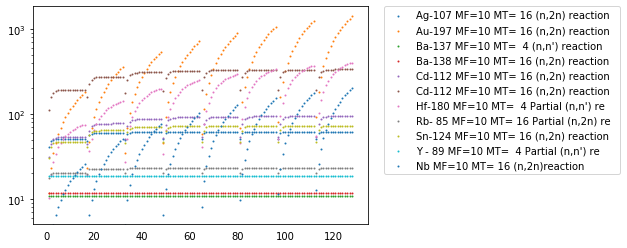

In [36]:
#taとtcの組み合わせでグラフを書く（照射時間が日にちをまたがない）（照射時間と計測時間を重複させて計算）

import numpy as np


tb = 5#冷却時間
# tb = 1
l = 0.5#箔圧[cm]
r = 1.5#箔の半径
N = 6.022*10**23#アボガドロ定数
DT = 5*10**9

tamax = 9
tcmax= 17

count_list = []
foil_list = []
foil1_list = []
ability_list = []

x = []
ticks = []
i = 1
for ta in range(1,tamax):
    for tc in range(1,tcmax):
        x.append(i)
        i = i + 1
            
        if tc == tcmax-1:
            ticks.append("(" + str(ta) + "," + str(tc) + ")")
        else:
            ticks.append(" ")
            
#             print("(" + str(ta) + str(tc) + ")")
            


for i in tqdm(range(len(result_list))):
    count_per_list = []
    
    #relativeはとばす------------------------------------------------------------
    if "*" in result_list[i][12]:
        o = "0"
    
    #relatveではないかつエネルギー、半減期が0ではないときに、諸量を計算------------------------------------------
    else:
        if float(result_list[i][11]) != 0:
            if result_list[i][13] != "0":
                

                if "<" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif "~" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif ">" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                else:
                    e = float(result_list[i][12])
#                 print(e)
                e = float(e)/100

                a = float(result_list[i][8])#平均原子量
                b = float(result_list[i][7])#存在比
                f = float(result_list[i][15])#Ge検出器効率
                g = float(result_list[i][14])#質量吸収係数
                h = float(result_list[i][10])#平均密度

                #Σσφ
                c = result_list[i][9]
                d = ""
                for t in range(len(result_list[i][13])-1):
                    d = d + result_list[i][13][t]
                d = float(d)
                
                if result_list[i][13][len(result_list[i][13])-1] == "s":
                    d = d
                elif result_list[i][13][len(result_list[i][13])-1] == "m":
                    d = d*60
    #                 print("m")
                elif result_list[i][13][len(result_list[i][13])-1] == "h":
                    d = d*60*60
    #                 print("h")
                elif result_list[i][13][len(result_list[i][13])-1] == "d":
                    d = d*60*60*24
    #                 print("d")
                elif result_list[i][13][len(result_list[i][13])-1] == "y":
                    d = d*60*60*24*365
    #                 print("y")
                    d = float(d)
#                 print(d,result_list[i][0]+" " + result_list[i][1],result_list[i][13])
                ability = []
                ability.append(b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f)
                ability.append(result_list[i])
#                 print(ability,result_list[i])
                ability_list.append(ability)
                for ta in range(1,tamax):
                    for tc in range(1,tcmax):
                        
                        
                        
                        count = b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))*DT
#                         ability = b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f
                        count_per_list.append(count)
                
#                 if d < 600:
#                     print(count_per_list[len(count_per_list)-1],result_list[i][0]+" " + result_list[i][1],result_list[i][13])
#                     print(count_per_list[len(count_per_list)-1],result_list[i],c)
#                 print(count_per_list[len(count_per_list)-1],a,b,c,d,e,f,g,h,result_list[i][0]+" " + result_list[i][1])
                count_list.append(count_per_list)
                foil_list.append(result_list[i][0]+" " + result_list[i][1])
                foil1_list.append(result_list[i])
                
                            
#                 if count > 20:
#                     print(result_list[i])
                
#                 ta = 8
#                 tc = 8
#                 pa = d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))
#                 print((pa,result_list[i]))
#Nbのカウントリスト------------------------------
Nb_a = 92.90637
Nb_b = 1.0
Nb_c = float("1.429090E-1")
Nb_d = 10.15*24*60*60
Nb_e = 0.9907
Nb_f = float("5.61E-03")
Nb_g = 0.0609
Nb_h = 8.57
count_Nb_list = []

for ta in range(1,tamax):
    for tc in range(1,tcmax):

        count_Nb = Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600)) * DT
        count_Nb_list.append(count_Nb)
#         print(count_Nb)

# ta = 8
# tc = 8
# pa = Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600))
# print(pa)



for i in range(len(count_list)):
#     if count_list[i][len(count_list[i])-1] > count_Nb_list[len(count_Nb_list)-1]:
    if count_list[i][0] > 10:
#     if count_list[i][8] > 15:
        plt.scatter(x,count_list[i],label =foil_list[i],s=1)
        print(count_list[i][len(count_list[i])-1],foil1_list[i])
    
#     else:
#         plt.plot(count_list[i])


plt.scatter(x,count_Nb_list,label = "Nb MF=10 MT= 16 (n,2n)reaction",s=1)
plt.legend()
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
# plt.xticks(rotation=45)
# plt.xticks(x, ticks)
# plt.xlabel("(Irradiation time , Measurement time)", fontsize = 15)
# plt.ylabel("Count", fontsize = 15)

plt.tick_params(bottom=False,
               left=True,
               right=False,
               top=False)
# plt.show()
plt.savefig("300_dpi_scatter.png", format="png", dpi=1000,bbox_inches="tight")



In [18]:
for i in range(len(result_list)):
    if result_list[i][0] == 'Au-197' and result_list[i][1] == 'MF=10 MT= 16 (n,2n) reaction  ' and result_list[i][2] == 0.0 and result_list[i][11] == '355.684': 
#     if result_list[i][0] == 'Au-197' and result_list[i][1] == 'MF=10 MT= 16 (n,2n) reaction  ':
        print(result_list[i])

['Au-197', 'MF=10 MT= 16 (n,2n) reaction  ', 0.0, '8.113730E+6 ', 79, 196, 'Au', '1', '196.966569', 1.695810066178187e-31, '19.32', '355.684', '87', '6.183d', 0.28731022399999995, 0.013341054676676123]


In [ ]:
#taとtcの組み合わせでグラフを書く（照射時間が日にちをまたぐ）（日数×照射時間（８時間で固定）×計測時間）
import numpy as np


l = 0.5#箔圧[cm]
r = 1.5#箔の半径
N = 6.022*10**23#アボガドロ定数
DT = 5*10**9

count_list = []
foil_list = []

x = []
ticks = []
i = 1
# for ta in range(1,tamax):
#     tb = (ta-1)//8*15+1
#     x.append(i)
#     i = i + 1

#     ticks.append(" ")

        
                
for i in range(35):
    x.append(i)
            
            
            
#             if tc == tcmax-1:
#                 tb = ta//8*15+1
#                 ticks.append("(" + str(ta) + "," + str(tb) + "," + str(tc) + ")")
#             else:
#                 ticks.append(" ")

for i in tqdm(range(len(result_list))):
    count_per_list = []
    
    #relativeはとばす------------------------------------------------------------
    if "*" in result_list[i][12]:
        o = "0"
    
    #relatveではないかつエネルギー、半減期が0ではないときに、諸量を計算------------------------------------------
    else:
        if float(result_list[i][11]) != 0:
            if result_list[i][13] != "0":
                
                #放出比
                if "<" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif "~" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif ">" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                else:
                    e = float(result_list[i][12])
#                 print(e)
                e = float(e)/100

                a = float(result_list[i][8])#平均原子量
                b = float(result_list[i][7])#存在比
                f = float(result_list[i][15])#Ge検出器効率
                g = float(result_list[i][14])#質量吸収係数
                h = float(result_list[i][10])#平均密度

                #Σσφ
                c = result_list[i][9]
                


                d = ""
                for t in range(len(result_list[i][13])-1):
                    d = d + result_list[i][13][t]
                d = float(d)

                if result_list[i][13][len(result_list[i][13])-1] == "s":
                    d = d
                elif result_list[i][13][len(result_list[i][13])-1] == "m":
                    d = d*60
    #                 print("m")
                elif result_list[i][13][len(result_list[i][13])-1] == "h":
                    d = d*60*60
    #                 print("h")
                elif result_list[i][13][len(result_list[i][13])-1] == "d":
                    d = d*60*60*24
    #                 print("d")
                elif result_list[i][13][len(result_list[i][13])-1] == "y":
                    d = d*60*60*24*365
    #                 print("y")
                    d = float(d)

                    
                for ta in range(1,8):
                    ta= ta*8
                    for tc in range(1,6):
                        
                        tc = tc * 24
                        tb = 15.0*((ta-1)//8)+1
#                         print(ta,tb,tc)
                        count = b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb*3600) * (1-np.exp(-1*np.log(2)/d*tc*3600))*DT
                        count_per_list.append(count)
                count_list.append(count_per_list)
                foil_list.append(result_list[i][0]+result_list[i][1])
#                 if count > 20:
#                     print(result[i])
                
#                 ta = 8
#                 tc = 8
#                 pa = d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))
#                 print((pa,result_list[i]))
#Nbのカウントリスト------------------------------
Nb_a = 92.90637
Nb_b = 1.0
Nb_c = float("1.429090E-1")
Nb_d = 10.15*24*60*60
Nb_e = 0.9907
Nb_f = float("5.61E-03")
Nb_g = 0.0609
Nb_h = 8.57
count_Nb_list = []


    
for ta in range(1,8):
    ta= ta*8
    for tc in range(1,6):
        
        tc = tc * 24
        tb = 15.0*((ta-1)//8)+1
        count_Nb = Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb*3600) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600)) * DT
        count_Nb_list.append(count_Nb)

# print(len(count_list))

# ta = 8
# tc = 8
# pa = Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600))
# print(pa)

k=0
markers1 = ["o","v","^","<",">","o","v","^","<",">","v","^","<",">","o","v","^","<",">"]
for i in range(len(count_list)):
    if count_list[i][4] > count_Nb_list[4]:
        print(count_list[i][4])
#     if count_list[i][4] > 100:
        plt.scatter(x,count_list[i],label =foil_list[i],s=20,marker = markers1[k])
        k = k + 1
print(count_Nb_list[4])
#         print(count_list[i][35],foil_list[i])
    
#     else:
#         plt.plot(count_list[i])
plt.scatter(x,count_Nb_list,label = "Nb",s=20,marker = "*")
plt.legend()
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
# plt.xticks(x, ticks)
plt.xticks(rotation=45)
plt.tick_params(bottom=False,
               left=True,
               right=False,
               top=False)
# plt.show()
plt.savefig("300_dpi_scatter.png", format="png", dpi=300)





2070.160023491533 5001359.117580266
3920.7797909542837 5001359.117580266
5575.141523796378 5001359.117580266
7054.058366257582 5001359.117580266
8376.136230787211 5001359.117580266
3929.4443580903394 9493257.59571641
7442.171549084087 9493257.59571641
10582.37438538116 9493257.59571641
13389.559036204711 9493257.59571641
15899.042045624503 9493257.59571641
5599.3337374891635 13527591.35650498
10604.858712192123 13527591.35650498
15079.548281885507 13527591.35650498
19079.697486277597 13527591.35650498
22655.6312819476 13527591.35650498
7099.120772499431 17150969.973065324
13445.380522523348 17150969.973065324
19118.620083511083 17150969.973065324
24190.213176787016 17150969.973065324
28723.964347923167 17150969.973065324
8446.13284296046 20405255.16051112
15996.554172919508 20405255.16051112
22746.254103037856 20405255.16051112
28780.149054816226 20405255.16051112
34174.150072052274 20405255.16051112
9655.932284889417 23328044.413841352
18287.853951292524 23328044.413841352
26004.36121

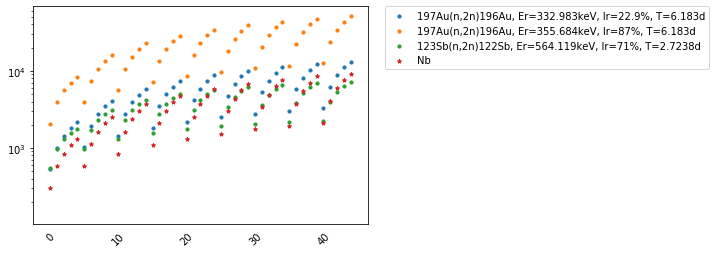

In [21]:
#taとtcの組み合わせでグラフを書く（照射時間が日にちをまたぐ）（日数×照射時間（８時間で固定）×計測時間）and マーカーを変えてプロット
import numpy as np


l = 0.5#箔圧[cm]
r = 1.5#箔の半径
N = 6.022*10**23#アボガドロ定数
DT = 5*10**9
ta = 8
tb = 15


count_list = []
foil_list = []

x = []
ticks = []
i = 1
# for ta in range(1,tamax):
#     tb = (ta-1)//8*15+1
#     x.append(i)
#     i = i + 1

#     ticks.append(" ")

        
q = 0         
for i in range(9):
    for ii in range(1,6):
        x.append(q)
        q = q + 1    
            
#[元素記号-原子番号、反応の種類、順位、閾値、娘核の原子番号、娘核の質量数、娘核の元素記号、存在比、平均原子量、Σσφ、密度、ガンマ線のエネルギー、放出比、半減期、質量吸収係数、検出効率]   
#             if tc == tcmax-1:
#                 tb = ta//8*15+1
#                 ticks.append("(" + str(ta) + "," + str(tb) + "," + str(tc) + ")")
#             else:
#                 ticks.append(" ")

for i in tqdm(range(len(result_list))):
    count_per_list = []
    
    #relativeはとばす------------------------------------------------------------
    if "*" in result_list[i][12]:
        o = "0"
    
    #relatveではないかつエネルギー、半減期が0ではないときに、諸量を計算------------------------------------------
    else:
        if float(result_list[i][11]) != 0:
            if result_list[i][13] != "0":
                
                #放出比
                if "<" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif "~" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                elif ">" in result_list[i][12]:
                    e = ""
                    for k in range(1,len(result_list[i][12])):
                        e = e + result_list[i][12][k]
                else:
                    e = float(result_list[i][12])
#                 print(e)
                e = float(e)/100

                a = float(result_list[i][8])#平均原子量
                b = float(result_list[i][7])#存在比
                f = float(result_list[i][15])#Ge検出器効率
                g = float(result_list[i][14])#質量吸収係数
                h = float(result_list[i][10])#平均密度

                #Σσφ
                c = result_list[i][9]
                


                d = ""
                for t in range(len(result_list[i][13])-1):
                    d = d + result_list[i][13][t]
                d = float(d)

                if result_list[i][13][len(result_list[i][13])-1] == "s":
                    d = d
                elif result_list[i][13][len(result_list[i][13])-1] == "m":
                    d = d*60
    #                 print("m")
                elif result_list[i][13][len(result_list[i][13])-1] == "h":
                    d = d*60*60
    #                 print("h")
                elif result_list[i][13][len(result_list[i][13])-1] == "d":
                    d = d*60*60*24
    #                 print("d")
                elif result_list[i][13][len(result_list[i][13])-1] == "y":
                    d = d*60*60*24*365
    #                 print("y")
                    d = float(d)

                    
                for ii in range(9):
                    if ii == 0:
                        housyaka =  b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT
                        not_housyaka =  b * (h*(r*r*3.14)*l)/a * N - housyaka
                    else:
                        not_housyaka = not_housyaka - not_housyaka * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT
                        housyaka = not_housyaka * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT + housyaka * np.exp(-1*np.log(2)/d*(tb+ta)*3600)
                    for tc in range(1,6):
                            count =  housyaka * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f  * np.exp(-1*np.log(2)/d*1*3600) * (1-np.exp(-1*np.log(2)/d*tc*24*3600))
                            count_per_list.append(count)
                            if result_list[i][0] == 'Au-197' and result_list[i][1] == 'MF=10 MT= 16 (n,2n) reaction  ' and result_list[i][2] == 0.0 and result_list[i][11] == '355.684': 
#                                 print(result_list[i])
                                print(count,housyaka)
                count_list.append(count_per_list)
                foil_list.append((result_list[i][0].split("-")[1]+result_list[i][0].split("-")[0]+"("+result_list[i][1].split("(")[1][:5]+str(result_list[i][5])+str(result_list[i][6]))+\
                                 ", Er="+str(result_list[i][11])+"keV, Ir="+str(result_list[i][12])+"%, T="+result_list[i][13])
#                 if count > 20:
#                     print(result[i])
                
#                 ta = 8
#                 tc = 8
#                 pa = d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))
#                 print((pa,result_list[i]))
#Nbのカウントリスト------------------------------
Nb_a = 92.90637
Nb_b = 1.0
Nb_c = float("1.429090E-1")
Nb_d = 10.15*24*60*60
Nb_e = 0.9907
Nb_f = float("5.61E-03")
Nb_g = 0.0609
Nb_h = 8.57
count_Nb_list = []

for i in range(9):
    if i == 0:
        housyaka =  Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT
        not_housyaka =  Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N - housyaka
    else:
        not_housyaka = not_housyaka - not_housyaka * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT
        housyaka = not_housyaka * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT + housyaka * np.exp(-1*np.log(2)/Nb_d*(tb+ta)*3600)
    for tc in range(1,6):
            count_Nb =  housyaka * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f  * np.exp(-1*np.log(2)/Nb_d*1*3600) * (1-np.exp(-1*np.log(2)/Nb_d*tc*24*3600))
            count_Nb_list.append(count_Nb)
# print(len(count_list))

# ta = 8
# tc = 8
# pa = Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600))
# print(pa)


markers1 = [",", "o", "v", "<"]
kk = 0
for i in range(len(count_list)):
    if count_list[i][4] > count_Nb_list[4]:
        print(count_list[i][4])
#     if count_list[i][4] > 100:
#         plt.scatter(x,count_list[i],label =foil_list[i],s=10,marker = markers1[kk])
        plt.scatter(x,count_list[i],label =foil_list[i],s=10)
        kk = kk + 1
#         print(count_list[i][35],foil_list[i])
    
#     else:
#         plt.plot(count_list[i])
plt.scatter(x,count_Nb_list,label = "Nb",s=15, marker = "*")
plt.legend()
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
# plt.xticks(x, ticks)
plt.xticks(rotation=45)
plt.tick_params(bottom=False,
               left=True,
               right=False,
               top=False)
# plt.show()
# plt.ylim(10**2,10**5)
print(count_Nb_list)
plt.savefig(str(l)+".png", format="png", dpi=300,bbox_inches="tight")





In [ ]:
#taとtcの組み合わせでグラフを書く（照射時間が日にちをまたぐ）（日数×照射時間（８時間で固定）×計測時間）
import numpy as np


# l = 0.5#箔圧[cm]
l_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5]
r = 1.5#箔の半径
N = 6.022*10**23#アボガドロ定数
DT = 5*10**9
ta = 8
tb = 15

for l in tqdm(l_list):
    count_list = []
    foil_list = []

    x = []
    ticks = []
    i = 1
    # for ta in range(1,tamax):
    #     tb = (ta-1)//8*15+1
    #     x.append(i)
    #     i = i + 1

    #     ticks.append(" ")


    q = 0         
    for i in range(9):
        for ii in range(1,6):
            x.append(q)
            q = q + 1    


    #             if tc == tcmax-1:
    #                 tb = ta//8*15+1
    #                 ticks.append("(" + str(ta) + "," + str(tb) + "," + str(tc) + ")")
    #             else:
    #                 ticks.append(" ")

    for i in tqdm(range(len(result_list))):
        count_per_list = []

        #relativeはとばす------------------------------------------------------------
        if "*" in result_list[i][12]:
            o = "0"

        #relatveではないかつエネルギー、半減期が0ではないときに、諸量を計算------------------------------------------
        else:
            if float(result_list[i][11]) != 0:
                if result_list[i][13] != "0":

                    #放出比
                    if "<" in result_list[i][12]:
                        e = ""
                        for k in range(1,len(result_list[i][12])):
                            e = e + result_list[i][12][k]
                    elif "~" in result_list[i][12]:
                        e = ""
                        for k in range(1,len(result_list[i][12])):
                            e = e + result_list[i][12][k]
                    elif ">" in result_list[i][12]:
                        e = ""
                        for k in range(1,len(result_list[i][12])):
                            e = e + result_list[i][12][k]
                    else:
                        e = float(result_list[i][12])
    #                 print(e)
                    e = float(e)/100

                    a = float(result_list[i][8])#平均原子量
                    b = float(result_list[i][7])#存在比
                    f = float(result_list[i][15])#Ge検出器効率
                    g = float(result_list[i][14])#質量吸収係数
                    h = float(result_list[i][10])#平均密度

                    #Σσφ
                    c = result_list[i][9]



                    d = ""
                    for t in range(len(result_list[i][13])-1):
                        d = d + result_list[i][13][t]
                    d = float(d)

                    if result_list[i][13][len(result_list[i][13])-1] == "s":
                        d = d
                    elif result_list[i][13][len(result_list[i][13])-1] == "m":
                        d = d*60
        #                 print("m")
                    elif result_list[i][13][len(result_list[i][13])-1] == "h":
                        d = d*60*60
        #                 print("h")
                    elif result_list[i][13][len(result_list[i][13])-1] == "d":
                        d = d*60*60*24
        #                 print("d")
                    elif result_list[i][13][len(result_list[i][13])-1] == "y":
                        d = d*60*60*24*365
        #                 print("y")
                        d = float(d)

                                
                    for ii in range(9):
                        if ii == 0:
                            housyaka =  b * (h*(r*r*3.14)*l)/a * N * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT
                            not_housyaka =  b * (h*(r*r*3.14)*l)/a * N - housyaka
                        else:
                            not_housyaka = not_housyaka - not_housyaka * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT
                            housyaka = not_housyaka * c * d/np.log(2) * (1-np.exp(-1*np.log(2)/d*ta*3600))*DT + housyaka * np.exp(-1*np.log(2)/d*(tb+ta)*3600)
                        for tc in range(1,6):
                                count =  housyaka * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f  * np.exp(-1*np.log(2)/d*1*3600) * (1-np.exp(-1*np.log(2)/d*tc*24*3600))
                                count_per_list.append(count)
                    count_list.append(count_per_list)
                    foil_list.append(result_list[i][0]+result_list[i][1])
                    
    #                 if count > 20:
    #                     print(result[i])

    #                 ta = 8
    #                 tc = 8
    #                 pa = d/np.log(2) * (1-np.exp(-1*l*h*g))/(l*h*g) * e * f * (1-np.exp(-1*np.log(2)/d*ta*3600)) * np.exp(-1*np.log(2)/d*tb) * (1-np.exp(-1*np.log(2)/d*tc*3600))
    #                 print((pa,result_list[i]))
    #Nbのカウントリスト------------------------------
    Nb_a = 92.90637
    Nb_b = 1.0
    Nb_c = float("1.429090E-1")
    Nb_d = 10.15*24*60*60
    Nb_e = 0.9907
    Nb_f = float("5.61E-03")
    Nb_g = 0.0609
    Nb_h = 8.57
    count_Nb_list = []

    
    for i in range(9):
        if i == 0:
            housyaka =  Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT
            not_housyaka =  Nb_b * (Nb_h*(r*r*3.14)*l)/Nb_a * N - housyaka
        else:
            not_housyaka = not_housyaka - not_housyaka * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT
            housyaka = not_housyaka * sigma_reaction_Nb * Nb_d/np.log(2) * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600))*DT + housyaka * np.exp(-1*np.log(2)/Nb_d*(tb+ta)*3600)
        for tc in range(1,6):
                count_Nb =  housyaka * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f  * np.exp(-1*np.log(2)/Nb_d*1*3600) * (1-np.exp(-1*np.log(2)/Nb_d*tc*24*3600))
                count_Nb_list.append(count_Nb)
    # print(len(count_list))
    

    
    # ta = 8
    # tc = 8
    # pa = Nb_d/np.log(2) * (1-np.exp(-1*l*Nb_h*Nb_g))/(l*Nb_h*Nb_g) * Nb_e * Nb_f * (1-np.exp(-1*np.log(2)/Nb_d*ta*3600)) * np.exp(-1*np.log(2)/Nb_d*tb) * (1-np.exp(-1*np.log(2)/Nb_d*tc*3600))
    # print(pa)



    for i in range(len(count_list)):
        if count_list[i][4] > count_Nb_list[4]:
            print(count_list[i][4])
    #     if count_list[i][4] > 100:
            plt.scatter(x,count_list[i],label =foil_list[i],s=5)
    #         print(count_list[i][35],foil_list[i])

    #     else:
    #         plt.plot(count_list[i])
    plt.scatter(x,count_Nb_list,label = "Nb",s=5)
    plt.legend()
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
    # plt.xticks(x, ticks)
    plt.xticks(rotation=45)
    plt.tick_params(bottom=False,
                   left=True,
                   right=False,
                   top=False)
    # plt.show()
    plt.ylim(10**2,10**5)
    plt.savefig("./Sn/"+str(l)+".png", format="png", dpi=300,bbox_inches="tight")
    print(l)
    plt.show()





In [ ]:
f = []
g = []
for i in range(1,2000):
    f.append(9*(1-np.exp(-(np.log(2))/(10)*i))*(1-np.exp(-(np.log(2))/(10)*i)))
    g.append(10*(1-np.exp(-(np.log(2))/(300)*i))*(1-np.exp(-(np.log(2))/(300)*i)))
    
plt.plot(f)
plt.plot(g)
plt.savefig("gazou.png", format="png", dpi=300,bbox_inches="tight")